# Description

This notebook generates a heatmap using a subset of the $\hat{\mathbf{M}}$ matrix (projectiong of S-MultiXcan results into latent gene expression representation). Traits in columns (organized by clusters of traits) and LVs in rows. The LVs shown are those detected to be driving clusters _and_ well-aligned (FDR < 0.05) with pathways (from the MultiPLIER models).

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = min((conf.GENERAL["N_JOBS"], 3))
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import conf
from entity import Trait
from data.cache import read_data

# Settings

In [5]:
OUTPUT_FIGURES_DIR = Path(conf.MANUSCRIPT["FIGURES_DIR"], "clustering").resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/clustering')

# Data loading

## MultiPLIER summary

In [6]:
multiplier_model_summary = read_data(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


In [9]:
well_aligned_lvs = multiplier_model_summary[
    (multiplier_model_summary["FDR"] < 0.05) | (multiplier_model_summary["AUC"] >= 0.75)
]

display(well_aligned_lvs.shape)
display(well_aligned_lvs.head())

(469, 5)

,pathway,LV index,AUC,p-value,FDR
2,REACTOME_MRNA_SPLICING,1,0.733057,4.772691e-05,5.816211e-04
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,1.628217e-03,1.136590e-02
8,REACTOME_MITOTIC_G1_G1_S_PHASES,1,0.686170,2.517619e-04,2.392292e-03
9,IRIS_Monocyte-Day0,2,0.890036,4.315812e-25,1.329887e-22
10,DMAP_MONO2,2,0.904676,1.313970e-16,1.574574e-14


## S-MultiXcan results

In [10]:
smultixcan_results_filename = conf.PHENOMEXCAN[
    "SMULTIXCAN_EFO_PARTIAL_MASHR_ZSCORES_FILE"
]
display(smultixcan_results_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/data/phenomexcan/gene_assoc/smultixcan-efo_partial-mashr-zscores.pkl')

In [11]:
smultixcan_results = pd.read_pickle(smultixcan_results_filename)

In [12]:
smultixcan_results.shape

(22515, 3752)

In [13]:
smultixcan_results.head()

,100001_raw-Food_weight,100002_raw-Energy,100003_raw-Protein,100004_raw-Fat,100005_raw-Carbohydrate,100006_raw-Saturated_fat,100007_raw-Polyunsaturated_fat,100008_raw-Total_sugars,100009_raw-Englyst_dietary_fibre,100010-Portion_size,...,visual impairment,vitiligo,vitreous body disease,vocal cord polyp,voice disorders,wellbeing measurement AND family relationship,wheezing,whooping cough,worry measurement,wrist fracture
gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,1.145442,0.724557,0.090876,0.298165,1.134347,1.371138,0.065718,0.794317,0.600342,0.317652,...,0.360518,1.351624,1.157695,0.835289,1.173072,1.337280,1.743822,1.017226,1.512184,0.972241
ENSG00000000457,0.618066,1.028131,2.218420,0.762584,0.934418,0.192993,1.080230,0.765997,0.375898,0.678731,...,2.134504,0.127830,0.534690,0.120516,0.517464,2.545363,0.673331,2.003092,0.344000,2.033122
ENSG00000000460,0.515724,0.403596,1.251359,0.433091,0.413466,0.246261,1.236151,0.827430,0.571985,0.782174,...,1.768905,0.992408,0.548215,0.412341,1.499415,1.366780,0.443318,0.417630,0.225934,1.613246
ENSG00000000938,0.280781,0.253910,0.879148,0.352705,0.051846,0.184212,0.148566,0.009989,0.363751,0.374514,...,0.656552,2.046041,2.746832,0.108211,1.008258,0.755695,0.896228,0.875047,0.476405,1.693057
ENSG00000000971,0.548127,0.389877,0.723469,1.167250,0.315952,0.324939,1.613932,0.311432,0.333548,1.807243,...,0.260482,0.646204,1.080240,0.678330,1.465358,0.307672,0.118376,1.419812,0.000002,1.040737


## S-MultiXcan projection (`z_score_std`)

In [14]:
INPUT_SUBSET = "z_score_std"

In [15]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [16]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [17]:
data = read_data(input_filepath)

In [18]:
data.shape

(3752, 987)

In [19]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


## Clustering results

In [20]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/results/clustering/consensus_clustering')

In [21]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [22]:
best_partitions = pd.read_pickle(input_file)

In [23]:
# keep selected partitions only
best_partitions = best_partitions[best_partitions["selected"]]

In [24]:
best_partitions.shape

(15, 4)

In [25]:
best_partitions.head()

,method,partition,ari_median,selected
k,,,,
14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090117,True
22,scc_020,"[13, 18, 18, 18, 18, 18, 18, 18, 18, 13, 18, 1...",0.090100,True
13,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089920,True
12,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089894,True
11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089616,True


# Get all clusters information

In [26]:
partition_k = 29

In [27]:
part = best_partitions.loc[partition_k, "partition"]

In [28]:
part.shape

(3752,)

In [29]:
part_cluster_size = pd.Series(part).value_counts()
display(part_cluster_size)

0     3293
28     135
25      87
27      47
20      18
19      17
22      15
17      14
18      13
15      12
13      10
14       9
9        8
10       8
6        7
21       7
16       6
11       6
4        6
1        5
12       5
2        4
3        4
5        4
24       3
7        3
8        3
26       2
23       1
dtype: int64

In [30]:
clusters_labels = {
    12: "Asthma",
    27: "Well-being",
    22: "Nutrients",
    15: "Heel bone",
    4: "Reticulocytes",
    2: "Red blood volumes",
    5: "Erythrocytes",
    23: "Read blood DW",
    20: "BMI",
    18: "Spirometry",
    19: "Height",
    10: "Keratometry",
    1: "Platelets",
    6: "Skin/hair color",
    13: "Autoimmune #13",
    26: "Autoimmune #26",
    8: "Autoimmune #8",
    17: "HTN/high cholesterol",
    25: "Other traits #25",
    21: "Eczema/IBD/SCZ",
    28: "Env. factors #28",
    11: "CAD/breast cancer",
    16: "Lipids/AD/Chronotype",
    14: "Other heart diseases",
    7: "Monocytes",
    24: "Lymphocytes",
    9: "Neutrophils",
    3: "Eosinophils",
}

In [31]:
all_clusters = []

for c_idx in part_cluster_size[part_cluster_size < 50].index:
    _df = pd.DataFrame(
        {
            "trait": data.index[part == c_idx].tolist(),
            "cluster_label": clusters_labels[c_idx],
            "cluster_idx": c_idx,
        }
    )

    all_clusters.append(_df)

In [32]:
# combine all
df = pd.concat(all_clusters, ignore_index=True)

In [33]:
df.shape

(237, 3)

In [34]:
df.head()

,trait,cluster_label,cluster_idx
0,20117_2-Alcohol_drinker_status_Current,Well-being,27
1,20126_0-Bipolar_and_major_depression_status_No...,Well-being,27
2,20403-Amount_of_alcohol_drunk_on_a_typical_dri...,Well-being,27
3,20416-Frequency_of_consuming_six_or_more_units...,Well-being,27
4,20421-Ever_felt_worried_tense_or_anxious_for_m...,Well-being,27


# Get top LVs for each cluster

In [35]:
CLUSTER_LV_DIR = (
    conf.RESULTS["CLUSTERING_INTERPRETATION"]["BASE_DIR"]
    / "cluster_lvs"
    / f"part{partition_k}"
)
display(CLUSTER_LV_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/results/clustering/interpretation/cluster_lvs/part29')

In [36]:
def _get_lvs_data(cluster_idx):
    cluster_lvs = pd.read_pickle(
        CLUSTER_LV_DIR / f"cluster_interpreter-part{partition_k}_k{cluster_idx}.pkl"
    )

    # keep well-aligned lvs only
    cluster_lvs = cluster_lvs[
        cluster_lvs.index.astype(str).isin(well_aligned_lvs["LV index"])
    ]

    cluster_lvs["cluster"] = cluster_idx

    return pd.Series([set(cluster_lvs["name"]), cluster_lvs])

In [37]:
clusters_df = df.groupby("cluster_idx")[["cluster_label", "cluster_idx"]].head(1)

# add top lvs for each cluster
clusters_df[["lvs_names", "lvs_data"]] = clusters_df["cluster_idx"].apply(_get_lvs_data)

clusters_df = clusters_df.set_index("cluster_label")
assert clusters_df.index.is_unique

display(clusters_df)

,cluster_idx,lvs_names,lvs_data
cluster_label,,,
Well-being,27,"{LV443, LV954, LV338, LV613}",name threshold impurity va...
BMI,20,"{LV197, LV234, LV45, LV3}",name threshold impurity va...
Height,19,"{LV881, LV81, LV266, LV195, LV234}",name threshold impurity va...
Nutrients,22,"{LV750, LV720}",name threshold impurity va...
HTN/high cholesterol,17,"{LV42, LV91, LV257, LV516, LV847, LV530}",name threshold impurity va...
Spirometry,18,"{LV300, LV197, LV777, LV246}",name threshold impurity va...
Heel bone,15,"{LV24, LV171, LV300, LV904, LV879, LV50}",name threshold impurity va...
Autoimmune #13,13,"{LV11, LV57, LV155, LV844, LV913, LV942, LV605}",name threshold impurity va...
Other heart diseases,14,"{LV538, LV136, LV770, LV18}",name threshold impurity val...


In [38]:
lvs_data = (
    pd.concat(clusters_df["lvs_data"].tolist())
    .reset_index()
    .set_index(["cluster", "idx"])
)

In [39]:
lvs_data.shape

(131, 5)

In [40]:
lvs_data.head(10)

name  threshold  impurity             value  n_samples
cluster idx                                                         
27      338  LV338   4.084612  0.024739  [[3705.0, 47.0]]       3752
        443  LV443   3.733668  0.024739  [[3705.0, 47.0]]       3752
        954  LV954   3.567636  0.024739  [[3705.0, 47.0]]       3752
        613  LV613   2.971709  0.024739  [[3705.0, 47.0]]       3752
20      45    LV45   3.330834  0.009549  [[3734.0, 18.0]]       3752
        234  LV234   2.649768  0.009549  [[3734.0, 18.0]]       3752
        197  LV197   2.357934  0.009549  [[3734.0, 18.0]]       3752
        3      LV3   2.062497  0.009549  [[3734.0, 18.0]]       3752
19      234  LV234   3.604574  0.009021  [[3735.0, 17.0]]       3752
        266  LV266   3.127553  0.009021  [[3735.0, 17.0]]       3752

In [41]:
_traits = df["trait"]
_lvs = set(lvs_data["name"])

In [42]:
_lvs

{'LV1',
 'LV11',
 'LV12',
 'LV128',
 'LV136',
 'LV140',
 'LV154',
 'LV155',
 'LV17',
 'LV171',
 'LV18',
 'LV195',
 'LV197',
 'LV2',
 'LV234',
 'LV24',
 'LV246',
 'LV257',
 'LV264',
 'LV266',
 'LV3',
 'LV30',
 'LV300',
 'LV31',
 'LV32',
 'LV335',
 'LV338',
 'LV34',
 'LV35',
 'LV358',
 'LV369',
 'LV37',
 'LV410',
 'LV42',
 'LV443',
 'LV449',
 'LV45',
 'LV46',
 'LV50',
 'LV516',
 'LV530',
 'LV538',
 'LV57',
 'LV583',
 'LV598',
 'LV603',
 'LV605',
 'LV61',
 'LV612',
 'LV613',
 'LV637',
 'LV671',
 'LV7',
 'LV70',
 'LV705',
 'LV71',
 'LV719',
 'LV720',
 'LV730',
 'LV746',
 'LV750',
 'LV767',
 'LV770',
 'LV777',
 'LV787',
 'LV81',
 'LV823',
 'LV83',
 'LV837',
 'LV844',
 'LV847',
 'LV853',
 'LV854',
 'LV865',
 'LV867',
 'LV879',
 'LV881',
 'LV904',
 'LV91',
 'LV913',
 'LV914',
 'LV928',
 'LV931',
 'LV937',
 'LV942',
 'LV953',
 'LV954',
 'LV96',
 'LV960',
 'LV964',
 'LV975',
 'LV977',
 'LV985',
 'LV986'}

In [43]:
data_subset = data.loc[_traits, _lvs].rename_axis("trait")
data_subset = data_subset.assign(
    cluster_name=df.set_index("trait")["cluster_label"].astype("category")
)

In [44]:
data_subset.shape

(237, 95)

In [45]:
data_subset

,LV128,LV171,LV45,LV30,LV18,LV854,LV50,LV246,LV953,LV746,...,LV369,LV750,LV538,LV931,LV867,LV81,LV837,LV942,LV777,cluster_name
trait,,,,,,,,,,,,,,,,,,,,,
20117_2-Alcohol_drinker_status_Current,0.541240,0.205505,1.075428,0.270563,0.087250,-1.234114,-0.901407,-0.335790,0.324106,-1.139976,...,0.152827,-0.787003,1.568490,1.521975,-0.254158,0.918192,-1.441798,-0.198532,0.284335,Well-being
20126_0-Bipolar_and_major_depression_status_No_Bipolar_or_Depression,-0.059205,1.868406,1.065401,-0.244166,-1.972137,-0.724567,-0.062752,0.994541,0.847669,1.285301,...,-0.186478,-0.722289,-0.675030,0.794486,0.887337,0.515766,-1.800414,-0.027989,0.483479,Well-being
20403-Amount_of_alcohol_drunk_on_a_typical_drinking_day,1.523778,0.116071,-0.332425,1.130043,-0.167695,-0.596225,0.471104,1.203440,0.398529,-1.478835,...,-0.284662,-1.643678,-0.788638,1.676139,-0.443937,0.772127,0.705414,0.634440,0.396509,Well-being
20416-Frequency_of_consuming_six_or_more_units_of_alcohol,0.121856,2.607017,-0.741188,0.578854,-0.669147,0.250210,-0.245537,0.205070,-1.577585,-1.112013,...,-0.202166,-0.555888,-1.249896,0.959923,-0.444994,-1.942210,0.372102,0.525614,0.431946,Well-being
20421-Ever_felt_worried_tense_or_anxious_for_most_of_a_month_or_longer,-0.993275,-0.622803,0.109246,-0.182624,0.851292,0.346642,0.591034,-0.156902,0.725931,-0.287228,...,-0.123389,0.000272,0.752566,0.784194,1.613483,1.722299,0.755232,0.560808,0.646330,Well-being
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
celiac disease,-1.178380,-1.068057,13.944983,-1.611672,-2.136045,0.344867,-2.019951,-0.934715,-1.543778,4.068321,...,-0.155474,-0.969208,0.876244,-4.324119,-1.660189,-1.534648,-0.690503,2.152166,0.809489,Autoimmune #8
malabsorption syndrome,-1.526264,-0.955612,9.204645,-0.794009,-1.217094,0.342472,-1.603461,-0.681080,-1.225518,1.886524,...,-0.343818,-1.335931,0.158695,-2.337933,-0.542507,-0.416349,-0.385258,0.635979,0.576972,Autoimmune #8
rheumatoid arthritis,-2.181833,0.312433,2.157063,-1.551191,-1.848235,0.543979,0.055239,0.154282,1.701489,4.576719,...,-0.045142,1.339189,-0.459373,-0.970806,-3.404945,0.665251,4.715189,4.161057,0.003054,Autoimmune #26


In [46]:
data_subset["trait_description"] = data_subset.apply(
    lambda x: Trait.get_trait(full_code=x.name).description
    if not Trait.is_efo_label(x.name)
    else x.name,
    axis=1,
)

In [47]:
data_subset

,LV128,LV171,LV45,LV30,LV18,LV854,LV50,LV246,LV953,LV746,...,LV750,LV538,LV931,LV867,LV81,LV837,LV942,LV777,cluster_name,trait_description
trait,,,,,,,,,,,,,,,,,,,,,
20117_2-Alcohol_drinker_status_Current,0.541240,0.205505,1.075428,0.270563,0.087250,-1.234114,-0.901407,-0.335790,0.324106,-1.139976,...,-0.787003,1.568490,1.521975,-0.254158,0.918192,-1.441798,-0.198532,0.284335,Well-being,Alcohol drinker status: Current
20126_0-Bipolar_and_major_depression_status_No_Bipolar_or_Depression,-0.059205,1.868406,1.065401,-0.244166,-1.972137,-0.724567,-0.062752,0.994541,0.847669,1.285301,...,-0.722289,-0.675030,0.794486,0.887337,0.515766,-1.800414,-0.027989,0.483479,Well-being,Bipolar and major depression status: No Bipola...
20403-Amount_of_alcohol_drunk_on_a_typical_drinking_day,1.523778,0.116071,-0.332425,1.130043,-0.167695,-0.596225,0.471104,1.203440,0.398529,-1.478835,...,-1.643678,-0.788638,1.676139,-0.443937,0.772127,0.705414,0.634440,0.396509,Well-being,Amount of alcohol drunk on a typical drinking day
20416-Frequency_of_consuming_six_or_more_units_of_alcohol,0.121856,2.607017,-0.741188,0.578854,-0.669147,0.250210,-0.245537,0.205070,-1.577585,-1.112013,...,-0.555888,-1.249896,0.959923,-0.444994,-1.942210,0.372102,0.525614,0.431946,Well-being,Frequency of consuming six or more units of al...
20421-Ever_felt_worried_tense_or_anxious_for_most_of_a_month_or_longer,-0.993275,-0.622803,0.109246,-0.182624,0.851292,0.346642,0.591034,-0.156902,0.725931,-0.287228,...,0.000272,0.752566,0.784194,1.613483,1.722299,0.755232,0.560808,0.646330,Well-being,"Ever felt worried, tense, or anxious for most ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
celiac disease,-1.178380,-1.068057,13.944983,-1.611672,-2.136045,0.344867,-2.019951,-0.934715,-1.543778,4.068321,...,-0.969208,0.876244,-4.324119,-1.660189,-1.534648,-0.690503,2.152166,0.809489,Autoimmune #8,celiac disease
malabsorption syndrome,-1.526264,-0.955612,9.204645,-0.794009,-1.217094,0.342472,-1.603461,-0.681080,-1.225518,1.886524,...,-1.335931,0.158695,-2.337933,-0.542507,-0.416349,-0.385258,0.635979,0.576972,Autoimmune #8,malabsorption syndrome
rheumatoid arthritis,-2.181833,0.312433,2.157063,-1.551191,-1.848235,0.543979,0.055239,0.154282,1.701489,4.576719,...,1.339189,-0.459373,-0.970806,-3.404945,0.665251,4.715189,4.161057,0.003054,Autoimmune #26,rheumatoid arthritis


In [48]:
data_subset = data_subset.replace(
    {
        "trait_description": {
            "platelet count": "Platelet count",
            "Red blood cell (erythrocyte) count": "Erythrocyte count",
            "erythrocyte count": "Erythrocyte count",
            "Red blood cell (erythrocyte) distribution width": "Erythrocyte distribution width",
            "reticulocyte count": "Reticulocyte count",
        }
    }
)

In [49]:
_cluster_column = data_subset.set_index("trait_description")["cluster_name"].to_dict()

In [50]:
_cluster_column

{'Alcohol drinker status: Current': 'Well-being',
 'Bipolar and major depression status: No Bipolar or Depression': 'Well-being',
 'Amount of alcohol drunk on a typical drinking day': 'Well-being',
 'Frequency of consuming six or more units of alcohol': 'Well-being',
 'Ever felt worried, tense, or anxious for most of a month or longer': 'Well-being',
 'Ever worried more than most people would in similar situation': 'Well-being',
 'Ever had prolonged loss of interest in normal activities': 'Well-being',
 'Ever had prolonged feelings of sadness or depression': 'Well-being',
 'Ever taken cannabis': 'Well-being',
 'General happiness': 'Well-being',
 'General happiness with own health': 'Well-being',
 'Belief that own life is meaningful': 'Well-being',
 'Ever thought that life not worth living': 'Well-being',
 'Ever contemplated self-harm': 'Well-being',
 'Felt hated by family member as a child': 'Well-being',
 'Physically abused by family as a child': 'Well-being',
 'Felt irritable or had 

In [51]:
data_subset

,LV128,LV171,LV45,LV30,LV18,LV854,LV50,LV246,LV953,LV746,...,LV750,LV538,LV931,LV867,LV81,LV837,LV942,LV777,cluster_name,trait_description
trait,,,,,,,,,,,,,,,,,,,,,
20117_2-Alcohol_drinker_status_Current,0.541240,0.205505,1.075428,0.270563,0.087250,-1.234114,-0.901407,-0.335790,0.324106,-1.139976,...,-0.787003,1.568490,1.521975,-0.254158,0.918192,-1.441798,-0.198532,0.284335,Well-being,Alcohol drinker status: Current
20126_0-Bipolar_and_major_depression_status_No_Bipolar_or_Depression,-0.059205,1.868406,1.065401,-0.244166,-1.972137,-0.724567,-0.062752,0.994541,0.847669,1.285301,...,-0.722289,-0.675030,0.794486,0.887337,0.515766,-1.800414,-0.027989,0.483479,Well-being,Bipolar and major depression status: No Bipola...
20403-Amount_of_alcohol_drunk_on_a_typical_drinking_day,1.523778,0.116071,-0.332425,1.130043,-0.167695,-0.596225,0.471104,1.203440,0.398529,-1.478835,...,-1.643678,-0.788638,1.676139,-0.443937,0.772127,0.705414,0.634440,0.396509,Well-being,Amount of alcohol drunk on a typical drinking day
20416-Frequency_of_consuming_six_or_more_units_of_alcohol,0.121856,2.607017,-0.741188,0.578854,-0.669147,0.250210,-0.245537,0.205070,-1.577585,-1.112013,...,-0.555888,-1.249896,0.959923,-0.444994,-1.942210,0.372102,0.525614,0.431946,Well-being,Frequency of consuming six or more units of al...
20421-Ever_felt_worried_tense_or_anxious_for_most_of_a_month_or_longer,-0.993275,-0.622803,0.109246,-0.182624,0.851292,0.346642,0.591034,-0.156902,0.725931,-0.287228,...,0.000272,0.752566,0.784194,1.613483,1.722299,0.755232,0.560808,0.646330,Well-being,"Ever felt worried, tense, or anxious for most ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
celiac disease,-1.178380,-1.068057,13.944983,-1.611672,-2.136045,0.344867,-2.019951,-0.934715,-1.543778,4.068321,...,-0.969208,0.876244,-4.324119,-1.660189,-1.534648,-0.690503,2.152166,0.809489,Autoimmune #8,celiac disease
malabsorption syndrome,-1.526264,-0.955612,9.204645,-0.794009,-1.217094,0.342472,-1.603461,-0.681080,-1.225518,1.886524,...,-1.335931,0.158695,-2.337933,-0.542507,-0.416349,-0.385258,0.635979,0.576972,Autoimmune #8,malabsorption syndrome
rheumatoid arthritis,-2.181833,0.312433,2.157063,-1.551191,-1.848235,0.543979,0.055239,0.154282,1.701489,4.576719,...,1.339189,-0.459373,-0.970806,-3.404945,0.665251,4.715189,4.161057,0.003054,Autoimmune #26,rheumatoid arthritis


In [52]:
# calculate mean of traits with the same description
_tmp = data_subset.groupby("trait_description").mean()
_tmp = _tmp.assign(cluster_name=_tmp.apply(lambda x: _cluster_column[x.name], axis=1))

In [53]:
_tmp.shape

(232, 95)

In [54]:
data_subset = _tmp.sort_values("cluster_name")

In [55]:
data_subset.shape

(232, 95)

In [56]:
data_subset.head()

,LV128,LV171,LV45,LV30,LV18,LV854,LV50,LV246,LV953,LV746,...,LV369,LV750,LV538,LV931,LV867,LV81,LV837,LV942,LV777,cluster_name
trait_description,,,,,,,,,,,,,,,,,,,,,
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: Hayfever, allergic rhinitis or eczema",0.342812,-0.655378,1.807809,-0.719927,-1.195300,-1.278624,1.604117,-1.036187,0.352969,0.890813,...,-0.506438,-0.787987,0.161351,-0.217717,-0.489078,1.476532,1.363184,4.440808,2.598281,Asthma
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: None of the above",0.182609,-0.847240,1.488802,-0.756750,-1.601228,-0.810870,0.990270,0.188253,0.345215,0.992543,...,-0.714886,-0.807739,-0.756743,-1.372652,-1.208260,1.504989,2.300591,4.691034,3.166724,Asthma
asthma,0.493745,-0.429557,1.394007,-1.057117,-0.931220,-0.445978,-0.215037,0.351986,0.070551,0.895782,...,-0.816416,-0.149110,-1.065024,-1.057482,-1.808398,0.929457,2.456109,2.472138,2.372784,Asthma
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: Asthma",-0.212200,0.182403,1.982130,-1.255168,-1.816759,-0.611750,-0.352129,0.171671,-0.169841,0.886164,...,-1.955777,-0.949680,-1.237327,-2.053026,-1.977620,1.285755,2.205914,2.436670,2.918877,Asthma
Lymphocyte count,-0.675364,-1.745616,2.904653,-1.251926,-1.602198,0.249549,0.214646,0.292079,0.305067,1.157161,...,-1.703200,0.444282,1.445493,-0.788977,-0.209906,1.389239,-1.568948,0.527363,1.322977,Asthma


In [57]:
data_subset.describe()

,LV128,LV171,LV45,LV30,LV18,LV854,LV50,LV246,LV953,LV746,...,LV71,LV369,LV750,LV538,LV931,LV867,LV81,LV837,LV942,LV777
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,...,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.461081,-0.094952,1.537365,0.381237,0.055767,-0.356026,0.179552,0.678980,-0.161194,-0.077990,...,0.541359,0.207257,-0.406773,0.169462,0.130266,-0.613597,0.702965,-0.024584,0.168435,1.009795
std,1.243483,1.162255,2.157254,2.506986,1.210248,1.226205,1.266452,1.446006,1.702662,1.197841,...,1.386570,1.176650,1.221836,1.048523,1.132702,1.243304,1.535054,1.343253,1.373453,1.388502
min,-2.728068,-2.219385,-1.290338,-2.138534,-2.838032,-2.801121,-3.514443,-2.006210,-3.584316,-2.564200,...,-2.232706,-2.175952,-3.091088,-2.840946,-4.324119,-3.720020,-2.865651,-2.856861,-2.495814,-2.412323
25%,-0.469448,-0.851622,-0.068488,-0.719211,-0.654332,-1.189303,-0.573906,-0.258048,-1.215850,-0.992842,...,-0.358154,-0.533621,-1.260982,-0.555551,-0.437307,-1.572359,-0.384818,-0.901528,-0.909045,0.195291
50%,0.450088,-0.212367,1.144169,-0.105069,0.178312,-0.603040,-0.031003,0.538583,-0.231431,-0.201425,...,0.485866,0.082443,-0.465966,0.165329,0.163068,-0.619685,0.465930,-0.368563,0.006711,0.764844
75%,1.279196,0.413666,2.546025,0.452438,0.660946,0.181815,0.778871,1.294371,0.387137,0.712566,...,1.391850,0.756905,0.363558,0.793586,0.891584,-0.032458,1.306896,0.511767,0.873128,1.651625
max,3.964160,4.811410,13.944983,15.161675,3.070118,4.068898,4.608126,6.632557,6.850068,4.576719,...,8.475124,3.595806,3.224789,4.014765,3.956483,4.160923,5.440833,5.047266,5.731688,6.228948


In [58]:
data_subset["cluster_name"].unique()

array(['Asthma', 'Autoimmune #13', 'Autoimmune #26', 'Autoimmune #8',
       'BMI', 'CAD/breast cancer', 'Eczema/IBD/SCZ', 'Eosinophils',
       'Erythrocytes', 'HTN/high cholesterol', 'Heel bone', 'Height',
       'Keratometry', 'Lipids/AD/Chronotype', 'Lymphocytes', 'Monocytes',
       'Neutrophils', 'Nutrients', 'Other heart diseases', 'Platelets',
       'Read blood DW', 'Red blood volumes', 'Reticulocytes',
       'Skin/hair color', 'Spirometry', 'Well-being'], dtype=object)

In [59]:
# this is the order from the clustering tree
cluster_order = [
    "Asthma",
    #     "Well-being",
    #     "Nutrients",
    "Heel bone",
    "Reticulocytes",
    "Red blood volumes",
    "Erythrocytes",
    "Read blood DW",
    "BMI",
    "Spirometry",
    "Height",
    "Keratometry",
    "Platelets",
    "Skin/hair color",
    "Autoimmune #13",
    "Autoimmune #26",
    "Autoimmune #8",
    "HTN/high cholesterol",
    #     "Other traits #25",
    "Eczema/IBD/SCZ",
    #     "Other traits #28",
    "CAD/breast cancer",
    "Lipids/AD/Chronotype",
    "Other heart diseases",
    "Monocytes",
    "Lymphocytes",
    "Neutrophils",
    "Eosinophils",
]

In [60]:
# _cluster = data_subset["cluster_name"].unique()
lut = dict(zip(cluster_order, sns.color_palette("Paired", len(cluster_order))))

In [61]:
row_colors = data_subset[["cluster_name"]].assign(
    color=data_subset["cluster_name"].map(lut)
)

In [62]:
row_colors.head(20)

,cluster_name,color
trait_description,,
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: Hayfever, allergic rhinitis or eczema",Asthma,"(0.6509803921568628, 0.807843137254902, 0.8901..."
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: None of the above",Asthma,"(0.6509803921568628, 0.807843137254902, 0.8901..."
asthma,Asthma,"(0.6509803921568628, 0.807843137254902, 0.8901..."
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: Asthma",Asthma,"(0.6509803921568628, 0.807843137254902, 0.8901..."
Lymphocyte count,Asthma,"(0.6509803921568628, 0.807843137254902, 0.8901..."
Treatment/medication code: levothyroxine sodium,Autoimmune #13,"(0.6509803921568628, 0.807843137254902, 0.8901..."
Treatment/medication code: insulin product,Autoimmune #13,"(0.6509803921568628, 0.807843137254902, 0.8901..."
"Never eat eggs, dairy, wheat, sugar: Wheat products",Autoimmune #13,"(0.6509803921568628, 0.807843137254902, 0.8901..."
"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Insulin",Autoimmune #13,"(0.6509803921568628, 0.807843137254902, 0.8901..."


# Plot data

In [63]:
_tmp = data_subset.reset_index().set_index(["cluster_name", "trait_description"])

In [64]:
plot_data = _tmp.loc[cluster_order].droplevel("cluster_name")

In [65]:
plot_data = plot_data.assign(
    color=row_colors["color"], cluster_name=row_colors["cluster_name"]
)

In [66]:
plot_data.shape

(170, 96)

In [67]:
plot_data.head()

,LV128,LV171,LV45,LV30,LV18,LV854,LV50,LV246,LV953,LV746,...,LV750,LV538,LV931,LV867,LV81,LV837,LV942,LV777,color,cluster_name
trait_description,,,,,,,,,,,,,,,,,,,,,
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: Hayfever, allergic rhinitis or eczema",0.342812,-0.655378,1.807809,-0.719927,-1.195300,-1.278624,1.604117,-1.036187,0.352969,0.890813,...,-0.787987,0.161351,-0.217717,-0.489078,1.476532,1.363184,4.440808,2.598281,"(0.6509803921568628, 0.807843137254902, 0.8901...",Asthma
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: None of the above",0.182609,-0.847240,1.488802,-0.756750,-1.601228,-0.810870,0.990270,0.188253,0.345215,0.992543,...,-0.807739,-0.756743,-1.372652,-1.208260,1.504989,2.300591,4.691034,3.166724,"(0.6509803921568628, 0.807843137254902, 0.8901...",Asthma
asthma,0.493745,-0.429557,1.394007,-1.057117,-0.931220,-0.445978,-0.215037,0.351986,0.070551,0.895782,...,-0.149110,-1.065024,-1.057482,-1.808398,0.929457,2.456109,2.472138,2.372784,"(0.6509803921568628, 0.807843137254902, 0.8901...",Asthma
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: Asthma",-0.212200,0.182403,1.982130,-1.255168,-1.816759,-0.611750,-0.352129,0.171671,-0.169841,0.886164,...,-0.949680,-1.237327,-2.053026,-1.977620,1.285755,2.205914,2.436670,2.918877,"(0.6509803921568628, 0.807843137254902, 0.8901...",Asthma
Lymphocyte count,-0.675364,-1.745616,2.904653,-1.251926,-1.602198,0.249549,0.214646,0.292079,0.305067,1.157161,...,0.444282,1.445493,-0.788977,-0.209906,1.389239,-1.568948,0.527363,1.322977,"(0.6509803921568628, 0.807843137254902, 0.8901...",Asthma


In [68]:
_tmp = plot_data.groupby("cluster_name").count().iloc[:, 0]

In [69]:
_tmp = _tmp.loc[cluster_order]

In [70]:
_tmp

cluster_name
Asthma                   5
Heel bone               12
Reticulocytes            5
Red blood volumes        4
Erythrocytes             3
Read blood DW            1
BMI                     16
Spirometry              13
Height                  17
Keratometry              8
Platelets                4
Skin/hair color          7
Autoimmune #13          10
Autoimmune #26           2
Autoimmune #8            3
HTN/high cholesterol    14
Eczema/IBD/SCZ           7
CAD/breast cancer        6
Lipids/AD/Chronotype     6
Other heart diseases     9
Monocytes                3
Lymphocytes              3
Neutrophils              8
Eosinophils              4
Name: LV128, dtype: int64

In [71]:
_tmp.cumsum()

cluster_name
Asthma                    5
Heel bone                17
Reticulocytes            22
Red blood volumes        26
Erythrocytes             29
Read blood DW            30
BMI                      46
Spirometry               59
Height                   76
Keratometry              84
Platelets                88
Skin/hair color          95
Autoimmune #13          105
Autoimmune #26          107
Autoimmune #8           110
HTN/high cholesterol    124
Eczema/IBD/SCZ          131
CAD/breast cancer       137
Lipids/AD/Chronotype    143
Other heart diseases    152
Monocytes               155
Lymphocytes             158
Neutrophils             166
Eosinophils             170
Name: LV128, dtype: int64

In [72]:
cluster_order_start_idx = np.array([0.5] + _tmp.cumsum()[:-1].tolist())
# cluster_order = _tmp.index.tolist()

In [73]:
cluster_order_start_idx

array([  0.5,   5. ,  17. ,  22. ,  26. ,  29. ,  30. ,  46. ,  59. ,
        76. ,  84. ,  88. ,  95. , 105. , 107. , 110. , 124. , 131. ,
       137. , 143. , 152. , 155. , 158. , 166. ])

In [74]:
# slightly change the "Blood DW" and "Reticulocytes" index since they overlap a bit in the figure
cluster_label_order_start_idx = cluster_order_start_idx.copy()
# cluster_label_order_start_idx[10] = cluster_label_order_start_idx[10] - 0.2
cluster_label_order_start_idx[4] = cluster_label_order_start_idx[4] - 1.0
cluster_label_order_start_idx[6] = cluster_label_order_start_idx[6] + 2.0

cluster_label_order_start_idx[13] = cluster_label_order_start_idx[13] - 1.0
cluster_label_order_start_idx[15] = cluster_label_order_start_idx[15] + 2.0

In [75]:
cluster_label_order_start_idx

array([  0.5,   5. ,  17. ,  22. ,  25. ,  29. ,  32. ,  46. ,  59. ,
        76. ,  84. ,  88. ,  95. , 104. , 107. , 112. , 124. , 131. ,
       137. , 143. , 152. , 155. , 158. , 166. ])

In [76]:
cluster_order_start_idx.shape

(24,)

In [77]:
len(cluster_order)

24

In [78]:
pd.Series(plot_data.drop(columns=["cluster_name", "color"]).values.flatten()).quantile(
    [0.90, 0.95, 0.97, 0.98, 0.99]
)

0.90    2.157095
0.95    3.137726
0.97    3.856286
0.98    4.503002
0.99    5.617544
dtype: float64

In [79]:
pd.Series(plot_data.drop(columns=["cluster_name", "color"]).values.flatten()).describe()

count    15980.000000
mean         0.291917
std          1.626993
min         -5.008842
25%         -0.721659
50%          0.076190
75%          1.006881
max         16.457020
dtype: float64

# Plotting functions

In [80]:
def _get_lv_pathway(lv_name):
    p = (
        well_aligned_lvs_df.loc[lv_name]
        .sort_values("FDR")
        .index.get_level_values("pathway")
    )
    return ", ".join(p)


def _get_lv_label(lv_name, n_top=2):
    lv_info = all_results[lv_name]

    cell_types_label = ""
    tissues_label = ""

    if "attr" in lv_info:
        cell_types_label = ", ".join(lv_info["attr"][:n_top])

    if "tissue" in lv_info:
        tissues_label = ", ".join(lv_info["tissue"][:n_top])

    final_label = ""

    if cell_types_label is not None:
        final_label += cell_types_label

    if tissues_label is not None:
        final_label += f" | {tissues_label}"

    return final_label

In [85]:
def plot_clustermap(rc, lv_labeling_function, output_filepath):
    with sns.plotting_context("paper", font_scale=1.25, rc=rc):
        g = sns.clustermap(
            data=plot_data.drop(columns=["cluster_name", "color"]).T,
            col_colors=plot_data["color"].rename("Cluster"),
            vmin=0.0,
            vmax=7.0,
            row_cluster=True,
            col_cluster=False,
            cmap="YlOrBr",
            dendrogram_ratio=0.05,
            cbar_pos=None,  # (-0.06, 0.8, 0.05, 0.18),
            xticklabels=False,
            yticklabels=True,
            figsize=(18, 13),
            method="complete",
            linewidths=0.25,
            rasterized=True,
        )

        g.ax_heatmap.set_xlabel("")
        g.ax_heatmap.set_ylabel("")

        g.ax_col_colors.set_xticks(cluster_label_order_start_idx)
        g.ax_col_colors.set_xticklabels(
            cluster_order,
            rotation=45,
            horizontalalignment="left",
        )
        g.ax_col_colors.xaxis.set_tick_params(size=0)
        g.ax_col_colors.xaxis.tick_top()

        g.ax_heatmap.get_xaxis().set_ticklabels(
            g.ax_heatmap.get_xaxis().get_ticklabels(),
            rotation=45,
            horizontalalignment="right",
        )

        if lv_labeling_function is not None:
            new_y_labels = []
            for t in g.ax_heatmap.get_yaxis().get_ticklabels():
                t.set_text(f"{t.get_text()}: {lv_labeling_function(t.get_text())}")
                t.set_fontsize(0.75 * t.get_fontsize())
                new_y_labels.append(t)

            g.ax_heatmap.get_yaxis().set_ticklabels(
                new_y_labels,
            )

        g.ax_heatmap.vlines(
            cluster_order_start_idx[1:], *g.ax_heatmap.get_ylim(), colors="black"
        )

        display(output_filepath)
        plt.savefig(
            output_filepath,
            dpi=600,
            bbox_inches="tight",
            facecolor="white",
        )

# Simple plot

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/clustering/global_clustermap-plain.svg')

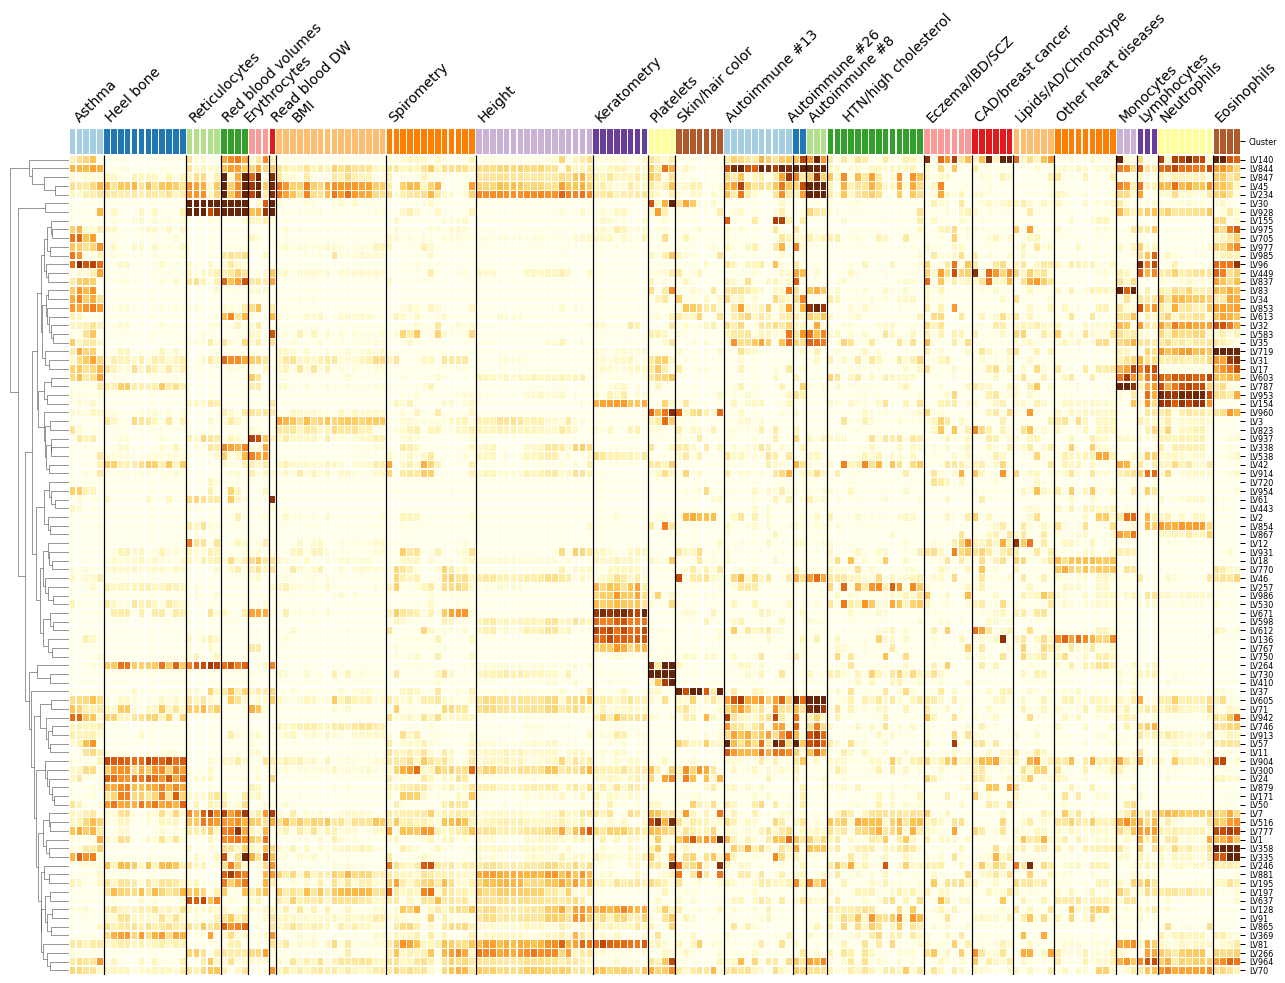

In [86]:
rc = {
    "axes.labelsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 8,
}

plot_clustermap(rc, None, OUTPUT_FIGURES_DIR / "global_clustermap-plain.svg")

# Take top cell types/tissues in LVs

The code below is not used now. The idea is to describe each LV taking the top two or three cell types/tissues.

In [83]:
# import re
# from collections import defaultdict

# from tqdm import tqdm

# from data.recount2 import LVAnalysis

In [84]:
# well_aligned_lvs_df = (
#     well_aligned_lvs.assign(
#         lv_name=well_aligned_lvs["LV index"].apply(lambda x: f"LV{x}")
#     )
#     .set_index(["lv_name", "pathway"])
#     .sort_index()
# )

In [85]:
# well_aligned_lvs_df.loc["LV960"].index

In [86]:
# selected_lvs = plot_data.drop(columns=["cluster_name", "color"]).columns.tolist()

In [87]:
# selected_lvs[:10]

In [88]:
# def _my_func(x):
#     _cols = [c for c in x.index if not c.startswith("LV")]
#     _tmp = x[_cols].dropna()
#     if _tmp.shape[0] > 0:
#         return _tmp.iloc[0]

#     return None

In [89]:
# import warnings
# from concurrent.futures import ProcessPoolExecutor, as_completed
# from utils import chunker

In [90]:
# cell_types_tissues_replacements = {
#     # Neutrophils
#     "primary human neutrophils": "Neutrophils",
#     "Neutrophil isolated from peripheral blood": "Neutrophils",
#     "Neutrophil": "Neutrophils",
#     "neutrophils (Neu)": "Neutrophils",
#     # granulocytes
#     "granulocyte": "Granulocytes",
#     # monocytes
#     "primary human monocytes": "Monocytes",
#     # whole blood
#     "Whole Blood": "Whole blood",
#     # PBMC
#     "primary human PBMC": "PBMC",
#     # B-cells
#     "primary human B cells": "B cells",
#     # T-cells
#     "primary human T cells": "T cells",
#     # epithelial cells
#     "epithelial cells (Epi)": "Epithelial cells",
#     "primary human myeloid DC": "mDCs",
# }

In [91]:
# def _get_combined_results(phenos):
#     lvs_info = defaultdict(dict)

#     for lv_name in phenos:  # tqdm(["LV136", "LV538"])::
#         #         print(lv_name, end=", ", flush=True)

#         lvs_info[lv_name]["pathways"] = well_aligned_lvs_df.loc[lv_name].index.tolist()

#         lv_obj = LVAnalysis(lv_name, data, debug=False)
#         lv_data = lv_obj.get_experiments_data()

#         # tissue
#         lv_attrs = lv_obj.get_attributes_variation_score()
#         _tmp = pd.Series(lv_attrs.index)
#         lv_attrs = lv_attrs[
#             _tmp.str.match(
#                 "(?:tissue$)|(?:tissue[^\w]*type$)",
#                 case=False,
#                 flags=re.IGNORECASE,
#             ).values
#         ].sort_values(ascending=False)

#         lv_attrs_data = lv_data[lv_attrs.index.tolist() + [lv_name]]
#         lv_attrs_data = lv_attrs_data.assign(
#             tissue_final=lv_attrs_data.apply(_my_func, axis=1)
#         )
#         lv_attrs_data = lv_attrs_data.drop(columns=lv_attrs.index)
#         #     lv_attrs_data = lv_attrs_data[lv_attrs_data[lv_name] > 0.0].dropna()
#         lv_attrs_data = lv_attrs_data.dropna().sort_values(lv_name, ascending=False)
#         lv_attrs_data = lv_attrs_data.replace(
#             {
#                 "tissue_final": cell_types_tissues_replacements,
#             }
#         )

#         #     for lva in lv_attrs.index:
#         #         lv_attr_data = lv_data[[lva, lv_name]].dropna().sort_values(
#         #             lv_name, ascending=False
#         #         )

#         #         lv_attr_data = lv_attr_data[lv_attr_data[lv_name] > 0.0]

#         _tmp = lv_attrs_data.groupby("tissue_final").median().squeeze()
#         if not isinstance(_tmp, float):
#             _tmp = _tmp.sort_values(ascending=False)
#             lvs_info[lv_name]["tissue"] = _tmp.head(10).index.tolist()

#         # cell type
#         lv_attrs = lv_obj.get_attributes_variation_score()
#         _tmp = pd.Series(lv_attrs.index)
#         lv_attrs = lv_attrs[
#             _tmp.str.match(
#                 "(?:cell[^\w]*type$)",
#                 case=False,
#                 flags=re.IGNORECASE,
#             ).values
#         ].sort_values(ascending=False)

#         lv_attrs_data = lv_data[lv_attrs.index.tolist() + [lv_name]]
#         lv_attrs_data = lv_attrs_data.assign(attr=lv_attrs_data.apply(_my_func, axis=1))
#         lv_attrs_data = lv_attrs_data.drop(columns=lv_attrs.index)
#         #     lv_attrs_data = lv_attrs_data[lv_attrs_data[lv_name] > 0.0].dropna()
#         lv_attrs_data = lv_attrs_data.dropna().sort_values(lv_name, ascending=False)
#         lv_attrs_data = lv_attrs_data.replace(
#             {
#                 "attr": cell_types_tissues_replacements,
#             }
#         )

#         #     for lva in lv_attrs.index:
#         #         lv_attr_data = lv_data[[lva, lv_name]].dropna().sort_values(
#         #             lv_name, ascending=False
#         #         )

#         #         lv_attr_data = lv_attr_data[lv_attr_data[lv_name] > 0.0]

#         _tmp = lv_attrs_data.groupby("attr").median().squeeze()
#         if not isinstance(_tmp, float):
#             _tmp = _tmp.sort_values(ascending=False)
#             lvs_info[lv_name]["attr"] = _tmp.head(10).index.tolist()

#     return lvs_info

In [92]:
# # phenotype_chunks = chunker(selected_lvs, int(len(selected_lvs) / conf.GENERAL["N_JOBS"]))
# phenotype_chunks = list(chunker(selected_lvs, 5))

In [93]:
# len(phenotype_chunks)

In [94]:
# phenotype_chunks[:4]

In [95]:
# # def _run(tissue, column, phenotype_chunks, n_jobs=conf.N_JOBS_HIGH):
# all_results = {}

# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", category=UserWarning)

#     with ProcessPoolExecutor(max_workers=N_JOBS) as executor:
#         tasks = [
#             executor.submit(_get_combined_results, chunk) for chunk in phenotype_chunks
#         ]
#         for future in tqdm(as_completed(tasks), total=len(phenotype_chunks)):
#             res = future.result()
#             all_results.update(res)

In [96]:
# all_results["LV746"]

In [97]:
# all_results["LV70"]

In [98]:
# all_results["LV136"]

In [99]:
# all_results["LV538"]

## Plot with cell types

In [100]:
# _get_lv_label("LV140")

In [101]:
# # with cell types as labels
# rc = {
#     #     "font.size": 9,
#     #     "xtick.labelsize": 10,
#     #     "ytick.labelsize": 19,
# }

# plot_clustermap(
#     rc, _get_lv_label, OUTPUT_FIGURES_DIR / "global_clustermap-cell_types.svg"
# )

## Plot with pathways

In [102]:
# _get_lv_pathway("LV603")

In [103]:
# # with pathways as labels
# rc = {
#     #     "font.size": 9,
#     #     "xtick.labelsize": 10,
#     #     "ytick.labelsize": 19,
# }

# plot_clustermap(
#     rc, _get_lv_pathway, OUTPUT_FIGURES_DIR / "global_clustermap-pathways.svg"
# )